# Learning and Decision Making

## Laboratory 3: Partially observable Markov decision problems

In the end of the lab, you should submit all code/answers written in the tasks marked as "Activity n. XXX", together with the corresponding outputs and any replies to specific questions posed to the e-mail <adi.tecnico@gmail.com>. Make sure that the subject is of the form [&lt;group n.&gt;] LAB &lt;lab n.&gt;.

### 1. Modeling

Consider once again the POMDP problem from the homework and represented in the transition diagram below.

<img src="pomdp.png" width="400px">

Recall that:

* All transitions occur with probability 1 except those from state $A$, where the probabilities are indicated under the edge label.

* At each step, the agent makes an observation corresponding to the letter in the state designation. Such observation occurs with probability 1.

Consider throughout that $\gamma=0.9$.

---

#### Activity 1.        

Implement your POMDP in Python. In particular,

* Create a list with all the states;
* Create a list with all the actions;
* Create a list with all the observations
* For each action, define a `numpy` array with the corresponding transition probabilities;
* For each action, define a `numpy` array with the corresponding observation probabilities;
* Define a `numpy` array with the cost describing the problem.

The order for the states and actions used in the transition probability and cost matrices should match that in the lists of states and actions. 

**Note**: Don't forget to import `numpy`.

---

In [1]:
import numpy as np

gamma = 0.9

states = ['A', 'B1', 'B2', 'C', 'D', 'E', 'F']

actions = ['a', 'b', 'c']

observations = ['A', 'B', 'C', 'D', 'E', 'F']

pA = np.array([[0,0.5,0.5,0,0,0,0],
               [0,0,0,0,0,1,0],
               [0,0,0,0,0,0,1],
               [0,1,0,0,0,0,0],
               [0,0,1,0,0,0,0],
               [1,0,0,0,0,0,0],
               [1,0,0,0,0,0,0]])

pB = np.array([[0,0.5,0.5,0,0,0,0],
               [0,0,0,0,0,0,1],
               [0,0,0,0,0,1,0],
               [0,1,0,0,0,0,0],
               [0,0,1,0,0,0,0],
               [1,0,0,0,0,0,0],
               [1,0,0,0,0,0,0]])
            
pC = np.array([[0,0.5,0.5,0,0,0,0],
               [0,0,0,1,0,0,0],
               [0,0,0,0,1,0,0],
               [0,1,0,0,0,0,0],
               [0,0,1,0,0,0,0],
               [1,0,0,0,0,0,0],
               [1,0,0,0,0,0,0]])

obs = np.array([[1,0,0,0,0,0],
               [0,1,0,0,0,0],
               [0,1,0,0,0,0],
               [0,0,1,0,0,0],
               [0,0,0,1,0,0],
               [0,0,0,0,1,0],
               [0,0,0,0,0,1]])

cost = np.array([[1, 1, 1],
                 [1, 1, 1],
                 [1, 1, 1],
                 [1, 1, 1],
                 [1, 1, 1],
                 [1, 1, 1],
                 [0, 0, 0]])

### 2. Sampling

You are now going to sample random trajectories of your POMDP and observe the impact it has on the corresponding belief.

---

#### Activity 2.

Generate a random POMDP trajectory using a uniformly random policy. In particular, from a random initial state $x_0$ generate:

1. A sequence of 10,000 states by selecting the actions uniformly at random;
2. The corresponding sequence of 10,000 actions;
3. The corresponding sequence of 10,000 observations.

---

In [2]:
from random import randint
length = 10000

#Uniformly random policy
policy = np.array([[1/3, 1/3, 1/3],
                   [1/3, 1/3, 1/3],
                   [1/3, 1/3, 1/3],
                   [1/3, 1/3, 1/3],
                   [1/3, 1/3, 1/3],
                   [1/3, 1/3, 1/3],
                   [1/3, 1/3, 1/3]])

#Choose a random initial state xO
x0 = states[randint(0, len(states)-1)]


trajectory_seq = []
action_seq = []
observation_seq = []

state = x0
for i in range(length):
    trajectory_seq +=[state]
    
    action = np.random.choice(actions, p=policy[states.index(state)])
    action_seq += [action]
    
    if action == 'a':
        p_new = pA
    elif action == 'b':
        p_new = pB
    elif action == 'c':
        p_new = pC
    else:
        raise ValueError('Invalid action.')
        
    new_state = np.random.choice(states, p=p_new[states.index(state)])
    
    
    observation = np.random.choice(observations, p=obs[states.index(new_state)])
    observation_seq += [observation]
   
    state = new_state
    
    
for i in range(15):
    print("Currently in state", trajectory_seq[i], ", then did action", action_seq[i],
          " and observed new state", observation_seq[i])


Currently in state C , then did action b  and observed new state B
Currently in state B1 , then did action b  and observed new state F
Currently in state F , then did action b  and observed new state A
Currently in state A , then did action c  and observed new state B
Currently in state B1 , then did action a  and observed new state E
Currently in state E , then did action b  and observed new state A
Currently in state A , then did action c  and observed new state B
Currently in state B1 , then did action a  and observed new state E
Currently in state E , then did action c  and observed new state A
Currently in state A , then did action c  and observed new state B
Currently in state B2 , then did action b  and observed new state E
Currently in state E , then did action c  and observed new state A
Currently in state A , then did action c  and observed new state B
Currently in state B2 , then did action a  and observed new state F
Currently in state F , then did action a  and observed ne

---

#### Activity 3.

For the POMDP trajectory generated in Activity 2, compute the corresponding sequence of beliefs, assuming that the agent does not know its initial state. Report the resulting beliefs, ignoring duplicate beliefs or beliefs whose distance is smaller than $10^{-3}$.

**Note 1:** You may want to define a function `belief_update` that receives a belief, an action and an observation and returns the updated belief.

**Note 2:** To compute the distance between vectors, you may find useful `numpy`'s function `linalg.norm`.


---

In [3]:
def belief_update(belief, action, observation):
    actionProb = None
    if action == 'a':
        actionProb = pA
    elif action == 'b':
        actionProb = pB
    elif action == 'c':
        actionProb = pC
    else:
        raise ValueError('Invalid action.')
        
        
    sum = 0
    t1 = np.dot(belief, actionProb)
    t2 = np.diag(obs[:,observations.index(observation)])
    numerator= np.dot(t1, t2)
    for x in np.nditer(numerator):
        sum += x
    if sum == 0:
        raise ValueError('Division by 0.')
    return numerator/sum


def newBelief(belief, prev_beliefs):
    for b in prev_beliefs:
        if np.linalg.norm(belief - b) < 10e-3:
            return False
    return True

#Since the agent does not know its initial state, his belief is equally distributed across all states
belief = np.array([1/7,1/7,1/7,1/7,1/7,1/7,1/7]) 

#List with all the calculated beliefs
belief_seq = [belief]

for i in range(length):
    next_belief = belief_update(belief, action_seq[i], observation_seq[i])
    if newBelief(next_belief, belief_seq):
        belief_seq += [next_belief]
        
    belief = next_belief
    
print(belief_seq)

[array([0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
       0.14285714, 0.14285714]), array([0. , 0.5, 0.5, 0. , 0. , 0. , 0. ]), array([0., 0., 0., 0., 0., 0., 1.]), array([1., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 1., 0.]), array([0., 0., 0., 1., 0., 0., 0.]), array([0., 1., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 1., 0., 0.]), array([0., 0., 1., 0., 0., 0., 0.])]


### 3. Solution methods

In this section you are going to compare different non-exact solution methods.

---

#### Activity 4

Compute the solution for the underlying MDP and report the corresponding optimal policy and optimal cost-to-go. 

** Note:** You may reuse code from previous labs.

---

In [4]:
# Insert your code here
i = 0
pi = policy
quit = False
while not quit:
    cpi = np.diag(pi[:,0]).dot(cost[:,0]) + np.diag(pi[:,1]).dot(cost[:,1]) + np.diag(pi[:,2]).dot(cost[:,2])
    Ppi = np.diag(pi[:,0]).dot(pA) + np.diag(pi[:,1]).dot(pB) + np.diag(pi[:,2]).dot(pC)
    J = np.linalg.inv(np.eye(7) - gamma * Ppi).dot(cpi)
    J_fix = []
    for el in J:
        J_fix += [[el]]
    J = np.array(J_fix)
    Q_A = cost[:,0:1] + gamma * pA.dot(J)
    Q_B = cost[:,1:2] + gamma * pB.dot(J)
    Q_C = cost[:,2:3] + gamma * pC.dot(J)
    pi_new = np.zeros(cost.shape)
    pi_new[:, 0, None] = np.isclose(Q_A, np.min([Q_A,Q_B, Q_C], axis=0)).astype(int)
    pi_new[:, 1, None] = np.isclose(Q_B, np.min([Q_A,Q_B, Q_C], axis=0)).astype(int)
    pi_new[:, 2, None] = np.isclose(Q_C, np.min([Q_A,Q_B, Q_C], axis=0)).astype(int)
    pi_new = pi_new / np.sum(pi_new, axis=1, keepdims=True)
    quit = (pi == pi_new).all()
    pi = pi_new
    i += 1
print("The optimal policy for the MDP is (achived in %s steps): " % (i))
print(pi)
print()



J = np.zeros((len(states),1))
err = 1
i = 0
while err > 1e-8:
    Q_A = cost[:,0:1] + gamma * pA.dot(J)
    Q_B = cost[:,1:2] + gamma * pB.dot(J)
    Q_C = cost[:,2:3] + gamma * pC.dot(J)
    J_new = np.min([Q_A, Q_B,Q_C], axis=0)
    err = np.linalg.norm(J_new-J)
    i += 1
    J = J_new

print("The optimal cost-to-go for the MDP is (achived in %s steps): " % (i))
print(J)

The optimal policy for the MDP is (achived in 2 steps): 
[[0.33333333 0.33333333 0.33333333]
 [0.         1.         0.        ]
 [1.         0.         0.        ]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]]

The optimal cost-to-go for the MDP is (achived in 183 steps): 
[[7.01107008]
 [6.67896676]
 [6.67896676]
 [7.01107008]
 [7.01107008]
 [7.30996307]
 [6.30996307]]


---

#### Activity 5

For each of the beliefs computed in Activity 3, compute the action prescribed by:

* The MLS heuristic;
* The AV heuristic;
* The Q-MDP heuristic.

---

In [5]:
# Insert your code here
pi_mdp = {"A":"a", "B1":"b", "B2":"a", "C":"a", "E":"a", "D":"a", "F":"a"} #This is our optimal policy computed in the previous step

mls_actions = []
for belief in belief_seq: 
    mls_actions += [pi_mdp[states[np.where(belief==np.max(belief))[0][0]]]] ## [0][0] because np.where returns a tuple, not the integer directly

print()
print("MLS Actions: ")
print(mls_actions)
    
av_actions = []
for belief in belief_seq:
    max_action = actions[0]
    max_sum = 0
    for action in actions:
        _sum = 0
        for x in range(len(states)):
            _sum += belief[x] * int(action==pi_mdp[states[x]])
        if _sum > max_sum:
            max_sum = _sum
            max_action = action
    av_actions += [max_action]

print()
print("AV Actions: ")
print(av_actions)
    
mdp_actions = []
Q_MDP = np.column_stack((Q_A, Q_B, Q_C))
for belief in belief_seq:
    mdp_actions += [actions[np.where(np.dot(belief,Q_MDP)==np.min(np.dot(belief,Q_MDP)))[0][0]]]
print()
print("Q-MDP Actions: ")
print(mdp_actions)


MLS Actions: 
['a', 'b', 'a', 'a', 'a', 'a', 'b', 'a', 'a']

AV Actions: 
['a', 'a', 'a', 'a', 'a', 'a', 'b', 'a', 'a']

Q-MDP Actions: 
['a', 'a', 'a', 'a', 'a', 'a', 'b', 'a', 'a']


---

#### Activity 6

Suppose that the optimal cost-to-go function for the POMDP can be represented using the $\alpha$-vectors



$$
\left\{
\begin{bmatrix}
8.39727208 \\
8.70168739 \\
7.80168739 \\
8.39727208 \\
8.39727208 \\
8.55748144 \\
7.55748144
\end{bmatrix},
\begin{bmatrix}
8.42645332 \\
8.70168739 \\
7.80168739 \\
8.02145332 \\
8.83145332 \\
8.55748144 \\
7.55748144
\end{bmatrix},
\begin{bmatrix}
8.42645332 \\
8.70168739 \\
7.80168739 \\
8.83145332 \\
8.02145332 \\
8.55748144 \\
7.55748144
\end{bmatrix},
\begin{bmatrix}
8.39727208 \\
7.80168739 \\
8.70168739 \\
8.39727208 \\
8.39727208 \\
8.55748144 \\
7.55748144
\end{bmatrix},
\begin{bmatrix}
8.42645332 \\
7.80168739 \\
8.70168739 \\
8.02145332 \\
8.83145332 \\
8.55748144 \\
7.55748144
\end{bmatrix},
\begin{bmatrix}
8.42645332 \\
7.80168739 \\
8.70168739 \\
8.83145332 \\
8.02145332 \\
8.55748144 \\
7.55748144
\end{bmatrix},
\begin{bmatrix}
8.39727208 \\
8.2192667  \\
8.2192667  \\
8.39727208 \\
8.39727208 \\
8.55748144 \\
7.55748144
\end{bmatrix},
\begin{bmatrix}
8.42645332 \\
8.2192667  \\
8.2192667  \\
8.02145332 \\
8.83145332 \\
8.55748144 \\
7.55748144
\end{bmatrix},
\begin{bmatrix}
8.42645332 \\
8.2192667  \\
8.2192667  \\
8.83145332 \\
8.02145332 \\
8.55748144 \\
7.55748144
\end{bmatrix},\right\}$$

where the first 3 vectors correspond to action $a$, the middle three vectors correspond to action $b$ and the last 3 vectors correspond to action $c$. Using the $\alpha$-vectors above, 

* Represent the the optimal cost-to-go function for all beliefs of the form $\mathbf{b}=[0, \epsilon, 1-\epsilon, 0, 0, 0, 0]$, with $\epsilon\in[0,1]$. 
* Compare the optimal policy with the MDP heuristics from Activity 5 in the beliefs computed in Activity 3.

** Note: ** Don't forget to import `matplotlib`, and use the magic `%matplotlib notebook`.

---

<IPython.core.display.Javascript object>


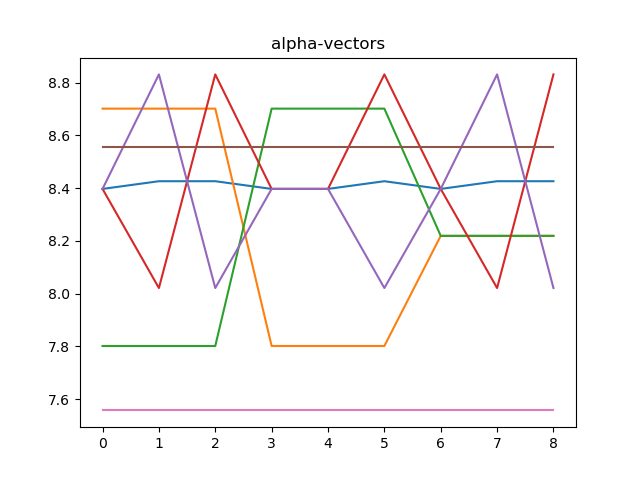

<IPython.core.display.Javascript object>


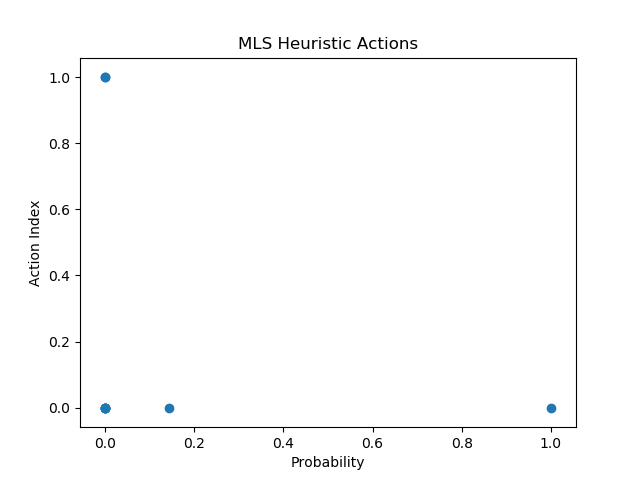

<IPython.core.display.Javascript object>


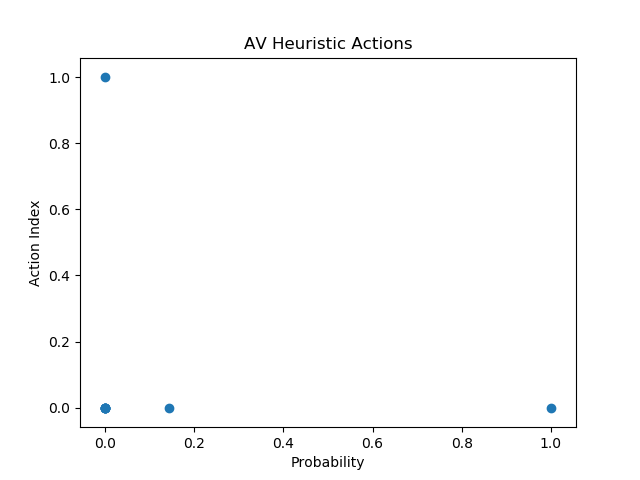

<IPython.core.display.Javascript object>


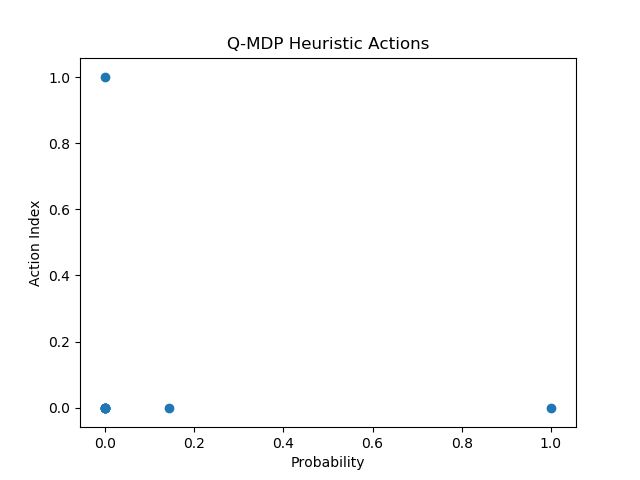

In [6]:
# Insert your code here

%matplotlib notebook

import matplotlib.pyplot as plt

## Plotting the a-vectors ##
plt.figure(1)
plt.title("alpha-vectors")
plt.plot([8.39727208,8.42645332,8.42645332,8.39727208,8.39727208,8.42645332,8.39727208,8.42645332,8.42645332])
plt.plot([8.70168739,8.70168739,8.70168739,7.80168739,7.80168739,7.80168739,8.2192667 ,8.2192667 ,8.2192667])
plt.plot([7.80168739,7.80168739,7.80168739,8.70168739,8.70168739,8.70168739,8.2192667 ,8.2192667 ,8.2192667])
plt.plot([8.39727208,8.02145332,8.83145332,8.39727208,8.39727208,8.83145332,8.39727208,8.02145332,8.83145332])
plt.plot([8.39727208,8.83145332,8.02145332,8.39727208,8.39727208,8.02145332,8.39727208,8.83145332,8.02145332])
plt.plot([8.55748144,8.55748144,8.55748144,8.55748144,8.55748144,8.55748144,8.55748144,8.55748144,8.55748144])
plt.plot([7.55748144,7.55748144,7.55748144,7.55748144,7.55748144,7.55748144,7.55748144,7.55748144,7.55748144])
plt.show()

plt.figure(2)
plt.title("MLS Heuristic Actions")
plt.xlabel("Probability")
plt.ylabel("Action Index")
x_values = []
y_values = []
for belief in belief_seq:
    x_values += [belief[0]]
    
for action in mls_actions:
    y_values += [actions.index(action)]
    
plt.scatter(x_values, y_values)

plt.show()

plt.figure(3)
plt.title("AV Heuristic Actions")
plt.xlabel("Probability")
plt.ylabel("Action Index")
x_values = []
y_values = []
for belief in belief_seq:
    x_values += [belief[0]]
    
for action in av_actions:
    y_values += [actions.index(action)]
    
plt.scatter(x_values, y_values)
plt.show()

plt.figure(4)
plt.title("Q-MDP Heuristic Actions")
plt.xlabel("Probability")
plt.ylabel("Action Index")
x_values = []
y_values = []
for belief in belief_seq:
    x_values += [belief[0]]
    
for action in mdp_actions:
    y_values += [actions.index(action)]
    
plt.scatter(x_values, y_values)
plt.show()


Insert your comments here